In [1]:
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Polygon, Point
import numpy as np

from pathlib import Path

from asim.dataset.maps.gpkg.gpkg_map import GPKGMap

from asim.common.visualization.maps.plot_maps import _plot_map_on_ax
from asim.common.geometry.base import Point2D
from asim.dataset.maps.map_datatypes import MapSurfaceType



name = "nuplan_us-pa-pittsburgh-hazelwood"
# name = "carla_town03"
map_file_path = Path(f"/home/daniel/asim_workspace/asim/notebooks/{name}.gpkg")

map_api = GPKGMap(map_file_path)
map_api.initialize()


In [2]:
map_api._gpd_dataframes[MapSurfaceType.LANE_GROUP]

,id,lane_group_id,intersection_id,predecessor_lane_group_ids,successor_lane_group_ids,left_boundary,right_boundary,geometry
0,14297,"['19816', '19851']",None,"['19401', '19403']",[],LINESTRING (588358.8812782683 4476058.00808735...,LINESTRING (588358.8812782683 4476058.00808735...,"POLYGON ((588389.934 4476023.638, 588358.881 4..."
1,14328,"['18502', '18503']",None,"['19475', '19478', '19482']","['19442', '19727']",LINESTRING (587912.301613621 4475579.495084676...,LINESTRING (587912.301613621 4475579.495084676...,"POLYGON ((587912.302 4475579.495, 587911.093 4..."
2,14340,"['18556', '18557']",None,"['19443', '19724']","['19479', '19480', '19481']",LINESTRING (587912.301613621 4475579.495084676...,LINESTRING (587912.301613621 4475579.495084676...,"POLYGON ((587917.375 4475575.254, 587904.673 4..."
3,14362,['19781'],None,"['19368', '19370', '19377']",['19647'],LINESTRING (587992.6485556379 4475325.12586453...,LINESTRING (587992.6485556379 4475325.12586453...,"POLYGON ((588001.813 4475335.343, 588004.756 4..."
4,14389,['19915'],None,"['19701', '19702', '19705']",['19708'],LINESTRING (587491.205337659 4475664.121434557...,LINESTRING (587491.205337659 4475664.121434557...,"POLYGON ((587491.205 4475664.121, 587486.213 4..."
...,...,...,...,...,...,...,...,...
809,19725,['20393'],17621,['19030'],['19217'],LINESTRING (587851.0317420952 4475485.51302427...,LINESTRING (587851.0317420952 4475485.51302427...,"POLYGON ((587850.876 4475485.65, 587850.688 44..."
810,19726,"['20396', '20397']",17709,['19218'],['19087'],LINESTRING (587770.7279535998 4475553.87821205...,LINESTRING (587770.7279535998 4475553.87821205...,"POLYGON ((587770.619 4475553.971, 587770.429 4..."
811,19727,['20398'],17621,['14328'],['19217'],LINESTRING (587849.3248722723 4475505.23914515...,LINESTRING (587849.3248722723 4475505.23914515...,"POLYGON ((587848.989 4475504.929, 587848.719 4..."
812,19728,['20399'],17709,['19029'],['19210'],LINESTRING (587749.0718455175 4475568.95351724...,LINESTRING (587749.0718455175 4475568.95351724...,"POLYGON ((587749.156 4475568.819, 587749.315 4..."


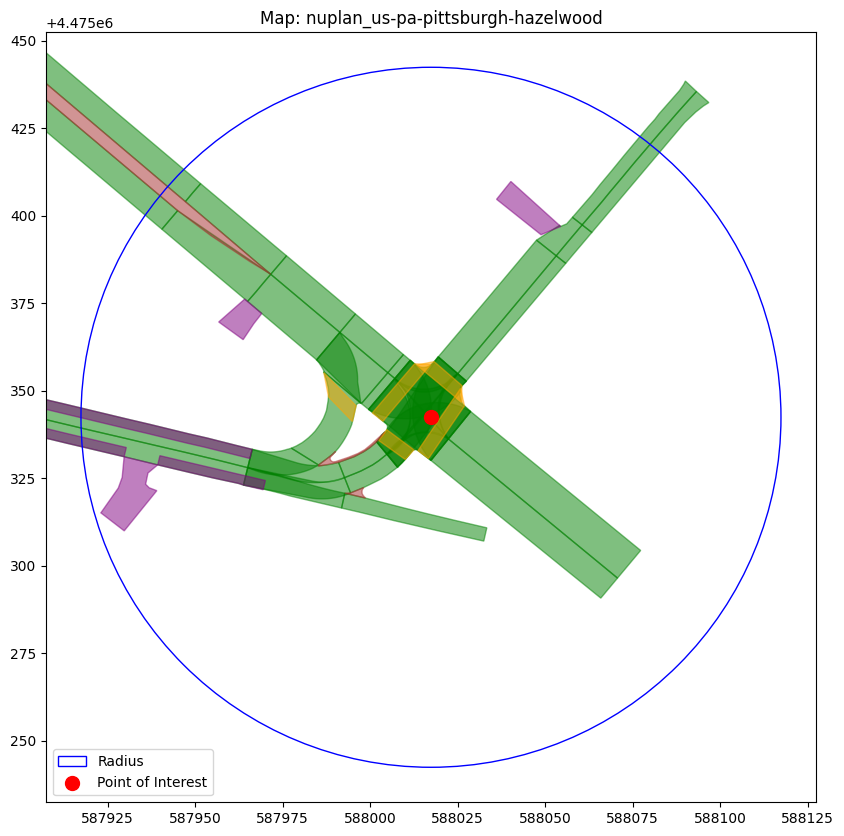

In [9]:
from matplotlib.patches import Circle
from shapely.geometry import point


def _get_random_point_in_lane(map_api: GPKGMap) -> Point2D:
    random_polygon = map_api._gpd_dataframes[MapSurfaceType.LANE_GROUP].sample(1).geometry.values[0]
    min_x, min_y, max_x, max_y = random_polygon.bounds
    random_point = Point2D(np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y))
    return random_point


radius = 100.0

point_2d = _get_random_point_in_lane(map_api)
# 587846.7073014547 4475507.41159812
# point_2d = Point2D(587846.7073014547, 4475507.41159812)
# point_2d = Point2D(589241.2456643095, 4474182.1963188)
# point_2d = Point2D(-79.9494029860944, 40.4132276919305)

fig, ax = plt.subplots(figsize=(10, 10))
_plot_map_on_ax(ax, map_api, point_2d, radius=radius)

# Add a circle with the specified radius
circle = Circle((point_2d.x, point_2d.y), radius=radius, color="blue", fill=False, label="Radius")
ax.add_patch(circle)

# Highlight the point of interest
ax.scatter(point_2d.x, point_2d.y, color="red", s=100, label="Point of Interest")


buffer_radius = 1.1 * radius
ax.set_xlim(point_2d.x - buffer_radius, point_2d.x + buffer_radius)
ax.set_ylim(point_2d.y - buffer_radius, point_2d.y + buffer_radius)

ax.set_aspect("equal", adjustable="box")
ax.legend()

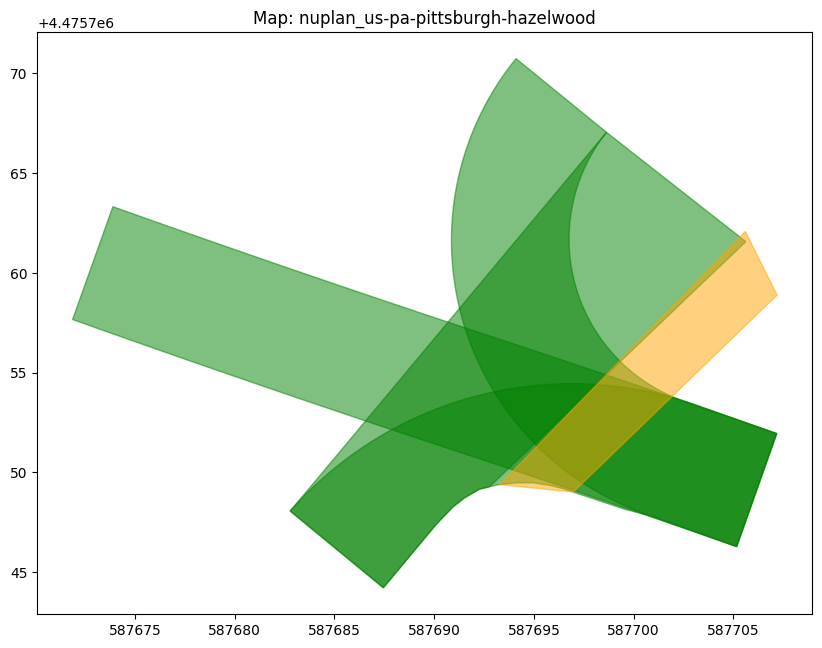

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))

_plot_map_on_ax(ax, map_api, point_2d, radius=2)

ax.set_aspect("equal", adjustable="box")


AttributeError: 'Series' object has no attribute 'successor_ids'

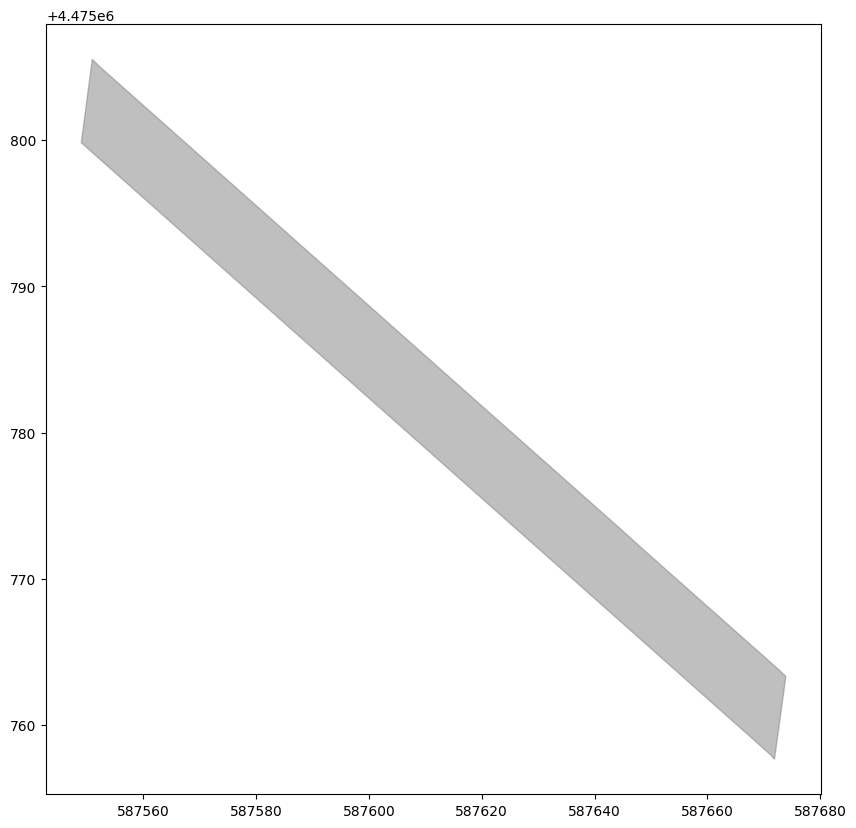

In [5]:
import ast

def plot_lane(ax, lane, color):
    ax.fill(*lane.shapely_polygon.exterior.xy, color=color, alpha=0.5)


map_objects_dict = map_api.get_proximal_map_objects(point_2d, radius=radius, layers=[MapSurfaceType.LANE_GROUP])
lane = map_objects_dict[MapSurfaceType.LANE_GROUP][3]

fig, ax = plt.subplots(figsize=(10, 10))


plot_lane(ax, lane, color="grey")

for lane_ in lane.successors:
    plot_lane(ax, lane_, color="green")

for lane_ in lane.predecessors:
    plot_lane(ax, lane_, color="red")

# ax.set_aspect("equal", adjustable="box")



lane = map_objects_dict[MapSurfaceType.LANE_GROUP][1]

# fig, ax = plt.subplots(figsize=(10, 10))


plot_lane(ax, lane, color="grey")

for lane_ in lane.successors:
    plot_lane(ax, lane_, color="green")

for lane_ in lane.predecessors:
    plot_lane(ax, lane_, color="red")

ax.set_aspect("equal", adjustable="box")

In [ ]:
import shapely.creation as geom_creation

line_with_z = LineString([(0, 0, 10), (1, 1, 20), (2, 2, 30)])


x, y = line_with_z.xy

z = 0.0
linestring = geom_creation.linestrings(*line_with_z.xy, z = 0.0)
print(linestring.has_z)

True
